In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("./boston.csv")

# Data Analysis

In [3]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# Dataset Description

  
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's




In [4]:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
np.shape(boston)

(506, 14)

In [6]:
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


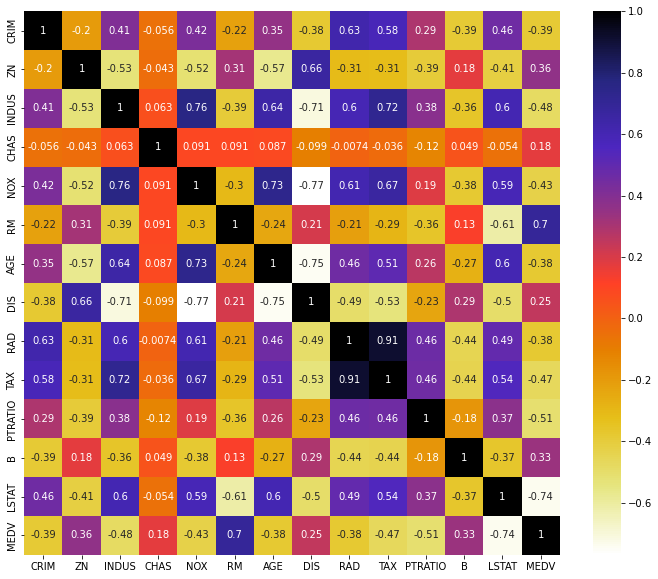

In [8]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
X1 = boston.drop(["MEDV","TAX"],axis=1) # new Feature matrix
y = boston["MEDV"] #target variable
X1.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,15.2,386.71,17.10


In [10]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

# Visualizing relationships of different feature columns wrt Y.

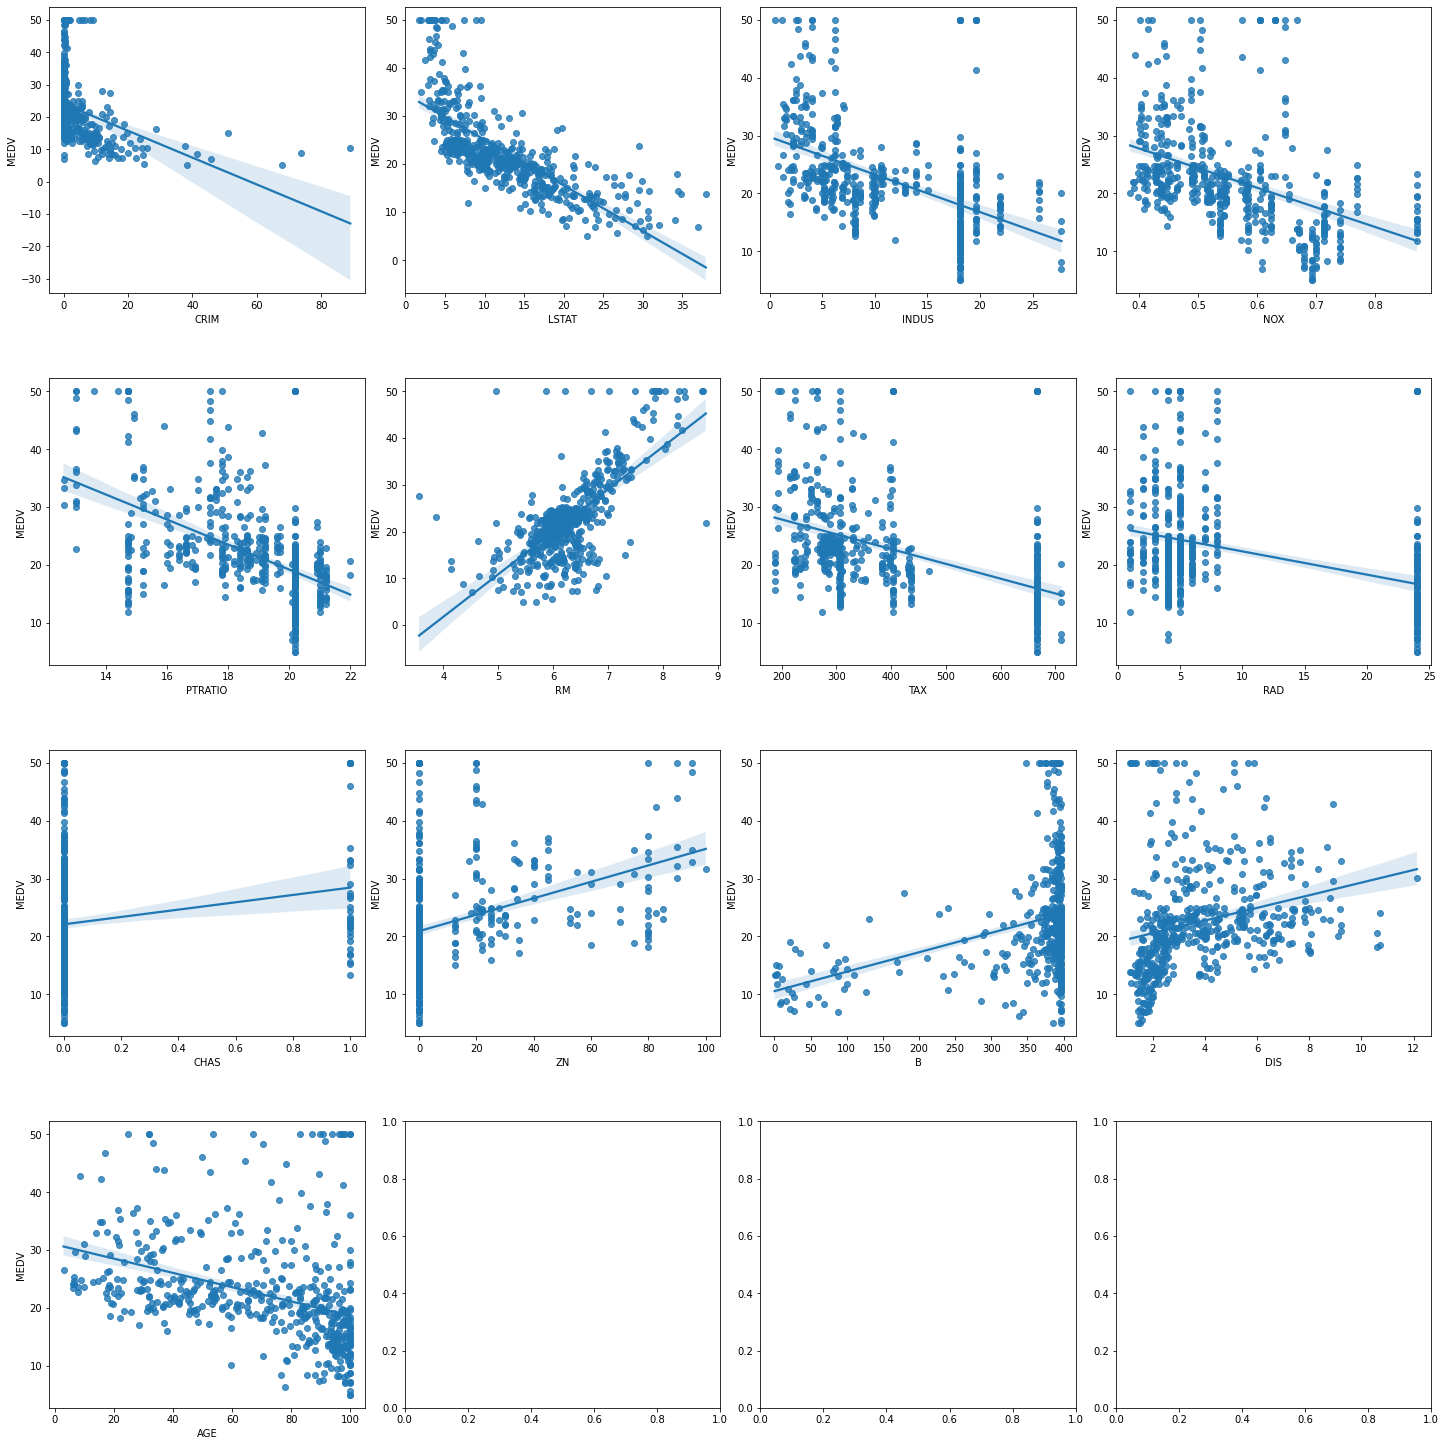

In [11]:
x_feature = ["CRIM",'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', "RAD","CHAS",'ZN','B','DIS', 'AGE']
x = boston.loc[:,x_feature]
y = boston['MEDV']
x = pd.DataFrame(data=x, columns=x_feature)
fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(x_feature):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



# Seeing some relationships between features

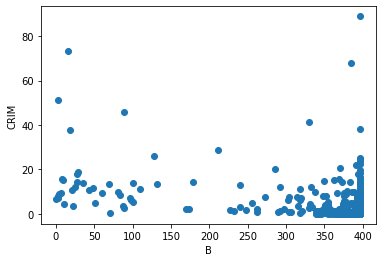

In [12]:
plt.scatter(boston['B'],boston['CRIM'])
plt.ylabel('CRIM')
plt.xlabel('B')
plt.show()


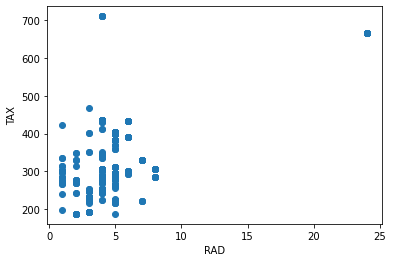

In [13]:
plt.scatter(boston['RAD'],boston['TAX'])
plt.ylabel('TAX')
plt.xlabel('RAD')
plt.show()

**From the above data analysis we can say that the following features are not good features: RAD, TAX , CHAS.
They do not show much dependencies with our dependent variable MEDV
So we remove them out from our training and testing dataset**

# Now doing univariable Linear Regression with feature as LSTAT:

In [14]:
#creating train-test split
suf_boston = pd.DataFrame.sample(boston,frac=1)
train_size = int(0.7*len(boston))

train_boston = suf_boston[:train_size]
test_boston = suf_boston[train_size:]

In [15]:
print("train_boston: "+str(len(train_boston))+" test_boston:"+str(len(test_boston)))

train_boston: 354 test_boston:152


In [16]:
lstat_train = train_boston.LSTAT
lstat_test = test_boston.LSTAT

y_train = train_boston.MEDV
y_test = test_boston.MEDV

In [17]:
lstat_train.head(10)

376    23.24
477    24.91
92      8.16
184    13.98
398    30.59
359    12.67
95      6.65
100     9.42
460    16.42
28     12.80
Name: LSTAT, dtype: float64

# Cost function and Gradient descent(univariate)

In [18]:
#calculating mean squared error
def cost_function(y_true,y_pred):
    cost = np.sum((y_pred-y_true)**2)/len(y_train)
    return cost

#gradient descent

def gradient_descent(x, y, iterations, learning_rate,threshold = 1e-6):
    curr_weight = 1.00
    curr_bias = 20.00   
    it = iterations
    alpha = learning_rate
    n = float(len(x))
    
    costs = []
    weights = []
    previous_cost = None
    
    for i in range(it):
        y_pred = (curr_weight*x) + curr_bias
        
        curr_cost = cost_function(y, y_pred)
        
        if previous_cost and abs(previous_cost-curr_cost)<=threshold:
            break
            
        previous_cost = curr_cost
        costs.append(curr_cost)
        weights.append(curr_weight)
        
        d_weight = -(2/n) *np.sum((y-y_pred)*x)
        d_bias = -(2/n) * np.sum(y-y_pred)
        
        curr_weight = curr_weight - (alpha * d_weight)
        curr_bias = curr_bias - (alpha * d_bias)
        
       # print(f"Iteration {i+1}: Cost {curr_cost}, Weight \ {curr_weight}, Bias \ {curr_bias}")
        
    plt.figure(figsize = (8,6))
    plt.plot(costs)
   # plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Itterations")
    plt.ylabel("Cost")
    plt.xlabel("Itteraions")
    plt.show()
     
    return curr_weight, curr_bias


    
        
        
        
        

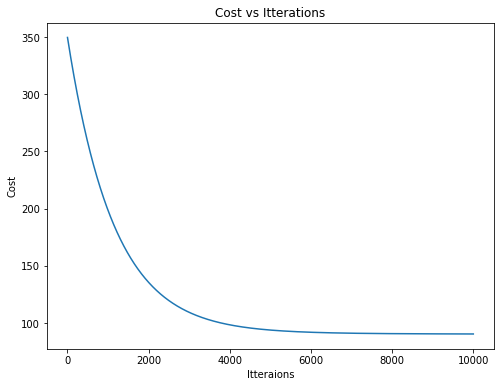

Estimated Weight: -0.074899220172561
Estimated Bias: 20.006237281669243


In [19]:
optimum_weight, optimum_bias = gradient_descent(np.array(lstat_train), np.array(y_train), iterations=10000, learning_rate=0.000001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [20]:
Y_pred = optimum_weight*lstat_test + optimum_bias
# Plotting the regression line
MSE = np.square(y_test-Y_pred).mean()
# plt.figure(figsize = (8,6))
# plt.scatter(age_train, y_train, marker='o', color='red')
# plt.plot([min(age_train), max(age_train)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',markersize=10,linestyle='dashed')
# plt.xlabel("AGE")
# plt.ylabel("MEDV")
# plt.show()
print("MSE: " ,MSE)

MSE:  87.50788530607325


# Testing against feature RM

In [21]:
#testing agianst feature RM
rm_train = train_boston.RM
rm_test = test_boston.RM

rm_train.head(10)

376    6.649
477    5.304
92     6.442
184    5.604
398    5.453
359    6.112
95     6.625
100    6.727
460    6.701
28     6.495
Name: RM, dtype: float64

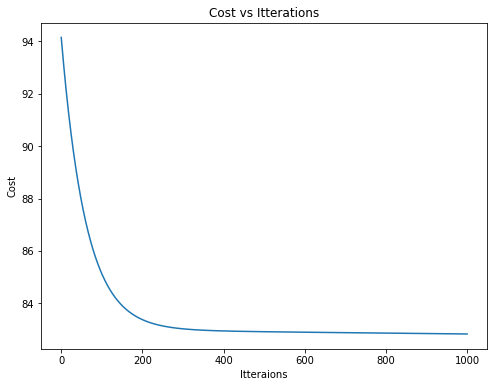

Estimated Weight: 0.5051339238165804
Estimated Bias: 19.791544720776724


In [22]:
optimum_weight, optimum_bias = gradient_descent(np.array(rm_train), np.array(y_train), iterations=1000, learning_rate=0.0001)
    
print(f"Estimated Weight: {optimum_weight}\nEstimated Bias: {optimum_bias}")

In [23]:
Y_pred = optimum_weight*rm_test +optimum_bias
MSE = np.square(y_test-Y_pred).mean()
print("MSE: ",MSE)

MSE:  74.08923543095061


**with univariate linear regression we see that the MSE is significantly large**

# Multiple Linear Regression